In [1]:
%matplotlib inline

import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np  

from pandas.tools.plotting import scatter_matrix
from math import ceil


In [2]:
#Load the dataset
dataset = pandas.read_csv('C:/Fall2018/ML/datasets/forestfires_0918.csv')

In [3]:
# Show first rows
dataset.head()  

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [4]:
dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,1.272727
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.626522
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,1.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,1.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,1.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,5.000000


In [5]:
fires_attributes = dataset.columns.values.tolist()
number_of_columns = len(fires_attributes)

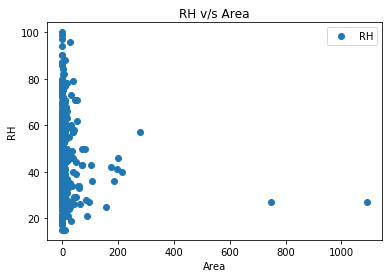

In [6]:

dataset.plot(x='area', y='RH', style='o')  
plt.title('RH v/s Area')  
plt.xlabel('Area')  
plt.ylabel('RH')  
plt.show()


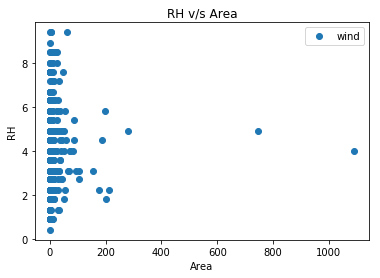

In [7]:
dataset.plot(x='area', y='wind', style='o')  
plt.title('RH v/s Area')  
plt.xlabel('Area')  
plt.ylabel('RH')  
plt.show()

In [8]:
dataset[dataset['area'] > 250]


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,5
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,4
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53,3


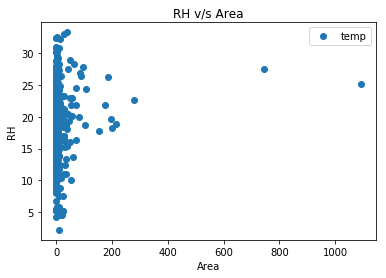

In [9]:
dataset.plot(x='area', y='temp', style='o')  
plt.title('RH v/s Area')  
plt.xlabel('Area')  
plt.ylabel('RH')  
plt.show()

In [10]:
# Show correlation between variables
dataset.corr()   


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385,0.061010
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873,0.006859
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.030932
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,0.052846
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,0.049033
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,-0.016523
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,0.058293
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,-0.050356
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.053379
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,0.034965


In [11]:
# Data preperation - Convert month and day from string values to numerical values
months_table = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days_table =   ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

dataset['month'] = [months_table.index(month) for month in dataset['month'] ]
dataset['day'] =   [days_table.index(day)     for day   in dataset['day']   ]

dataset['X'] -= 1
dataset['Y'] -= 2

dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
0,6,3,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,6,2,9,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,6,2,9,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,4,2,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,4,2,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [12]:
# Excluding row headers
for idx in list(range(4, number_of_columns - 1)):  
    dataset[fires_attributes[idx]] = dataset[fires_attributes[idx]] - \
                                   dataset[fires_attributes[idx]].mean()

In [13]:
statistics = [dataset[fires_attributes[idx]].mean() for idx in range(0, number_of_columns)]
statistics = pandas.DataFrame(statistics, 
                              index=fires_attributes,
                              columns=['mean'])

In [14]:
# Mean for FFMC through Rain is 0.000
statistics.T


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
mean,3.669246,2.299807,6.475822,2.972921,2.319091e-13,-1.665721e-14,4.511190e-13,-3.411842e-15,1.504921e-15,9.029528e-15,-7.868196e-16,4.262655e-17,4.892712e-15,1.272727


In [15]:
 statistics = list()
# Apply OLS and Print OLS regression results
for idx in range(0, number_of_columns - 1):
    model = smf.ols(formula = "area ~ " + 
                    fires_attributes[idx], data = dataset).fit()
    title = 'Model: area ~ ' + fires_attributes[idx]
    print('area vs ' + fires_attributes[idx])
    print(model.summary())
    statistics.append([model.f_pvalue, model.rsquared])

area vs X
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.077
Date:                Tue, 25 Sep 2018   Prob (F-statistic):              0.150
Time:                        23:13:44   Log-Likelihood:                -2879.4
No. Observations:                 517   AIC:                             5763.
Df Residuals:                     515   BIC:                             5771.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3986      5.247     -1.22

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
area vs DC
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.259
Date:                Tue, 25 Sep 2018   Prob (F-statistic):              0.262
Time:                        23:13:44   Log-Likelihood:                -2879.8
No. Observations:                 517   AIC:                             5764.
Df Residuals:                     515   BIC:                             5772.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

area vs area
                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.460e+33
Date:                Tue, 25 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:13:44   Log-Likelihood:                 15468.
No. Observations:                 517   AIC:                        -3.093e+04
Df Residuals:                     515   BIC:                        -3.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.442e-15   1.08e-15      2

In [16]:
statistics = pandas.DataFrame(statistics, 
                              index=fires_attributes[: number_of_columns - 1], 
                              columns=['p-value', 'R-squared'])
statistics.T

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
p-value,0.150096,0.308510,0.199669,0.272398,0.362592,0.097335,0.262363,0.851418,0.026101,0.086271,0.779939,0.867310,0.0
R-squared,0.004018,0.002014,0.003192,0.002339,0.001610,0.005328,0.002439,0.000068,0.009573,0.005703,0.000152,0.000054,1.0


In [17]:
statistics[statistics['p-value'] < 0.10]


,p-value,R-squared
DMC,0.097335,0.005328
temp,0.026101,0.009573
RH,0.086271,0.005703
area,0.000000,1.000000


In [18]:
statistics[statistics['p-value'] < 0.05]


,p-value,R-squared
temp,0.026101,0.009573
area,0.000000,1.000000


In [19]:
print((smf.ols(formula = "area ~ temp", data = dataset).fit()).summary())


                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.978
Date:                Tue, 25 Sep 2018   Prob (F-statistic):             0.0261
Time:                        23:13:44   Log-Likelihood:                -2878.0
No. Observations:                 517   AIC:                             5760.
Df Residuals:                     515   BIC:                             5768.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.442e-15      2.789   8.76e-16      1.0

In [20]:
# Combination of all variables
explanatory_variables = "X + Y + month + day + FFMC + DMC + DC + ISI + temp + RH + " + \
                        "wind + rain"
response_variable =     "area"

model = smf.ols(formula = response_variable + " ~ " + explanatory_variables, 
                data = dataset).fit()

                            OLS Regression Results                            
Dep. Variable:                   area   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.092
Date:                Tue, 25 Sep 2018   Prob (F-statistic):              0.364
Time:                        23:13:45   Log-Likelihood:                -2873.8
No. Observations:                 517   AIC:                             5774.
Df Residuals:                     504   BIC:                             5829.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -30.4447     19.340     -1.574      0.1

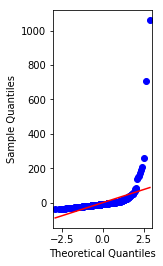

In [21]:
print(model.summary())
ax1 = plt.subplot(1, 3, 1)
qq_plot = sm.qqplot(model.resid, line = 'r', ax = ax1)


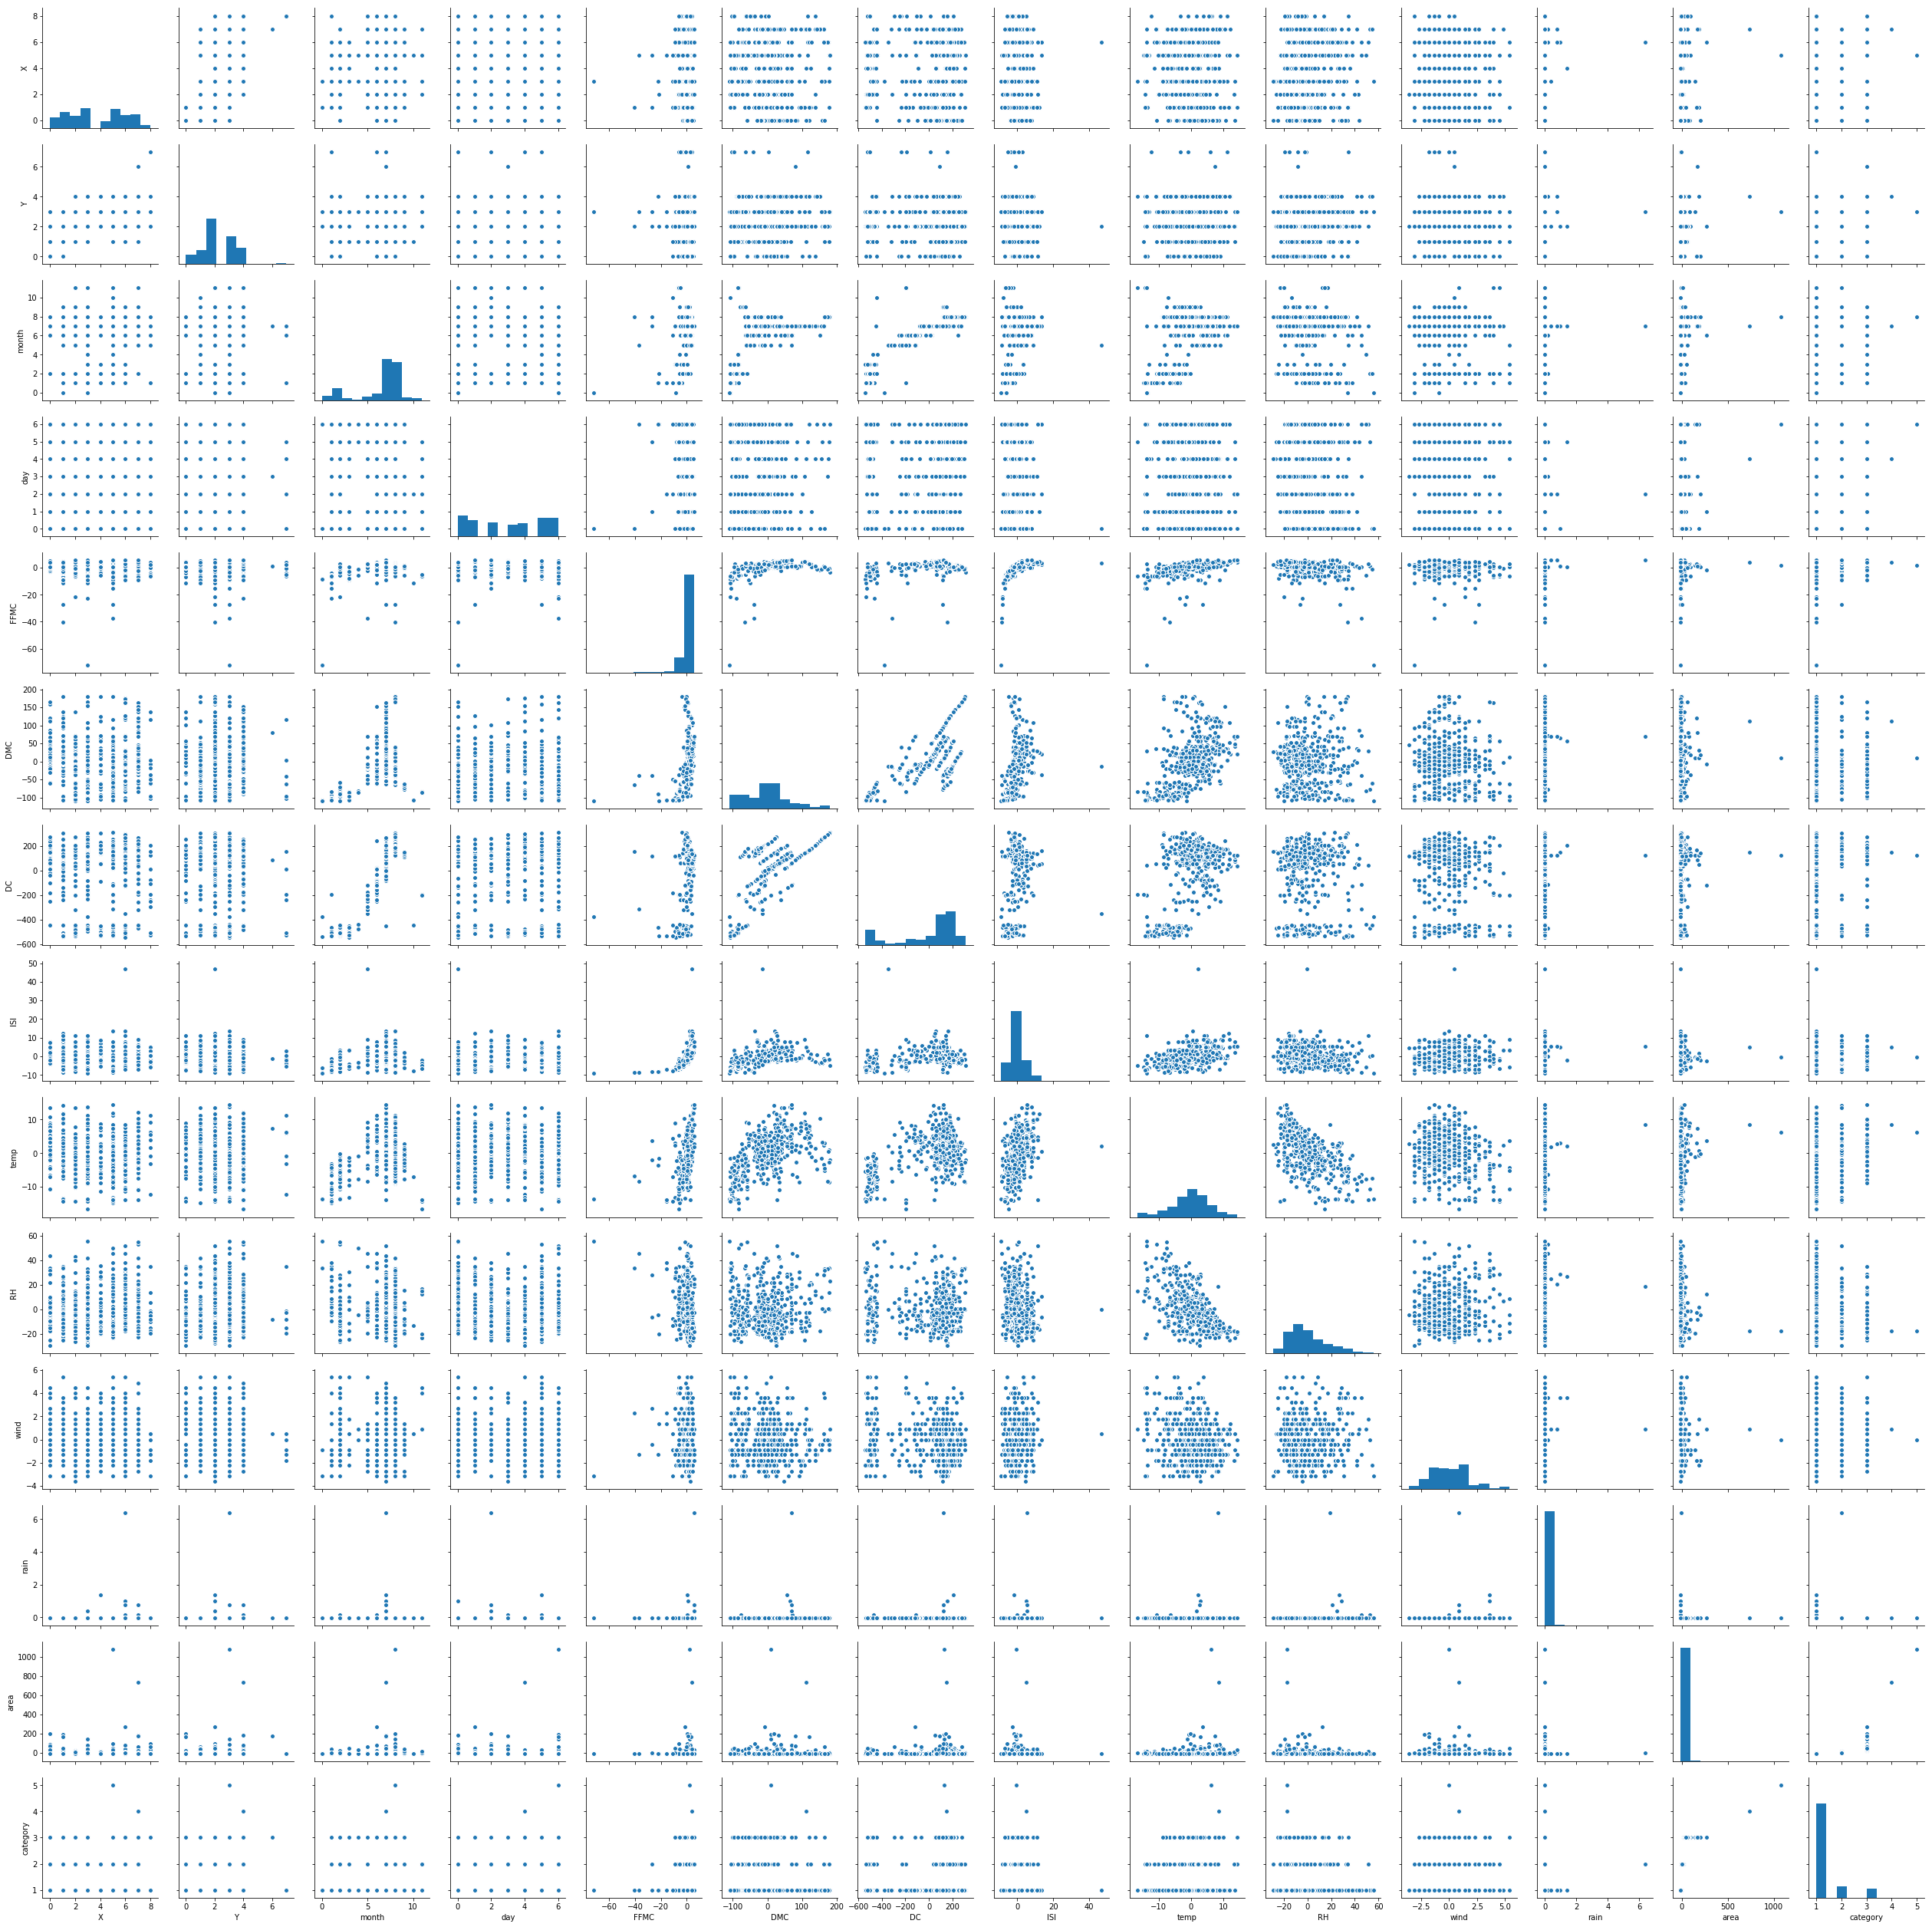

In [22]:
sns.pairplot(dataset)

In [23]:
import pandas as pd

# load dataset into Pandas DataFrame
dataset = pandas.read_csv('C:/Fall2018/ML/datasets/forestfires_0918.csv')

In [24]:
from sklearn.preprocessing import StandardScaler
features = ['DMC','DC','temp','RH','rain','wind','FFMC']

# Separating out the features
X = dataset.iloc[:, [5,6,8,9,11,10,4]].values

# Separating out the target
Y= dataset.iloc[:, [13]].values

# Standardizing the features
X= StandardScaler().fit_transform(X)

In [25]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component1','principal component2'])

In [26]:
finalDf = pd.concat([principalDf, dataset[['category']]], axis = 1)

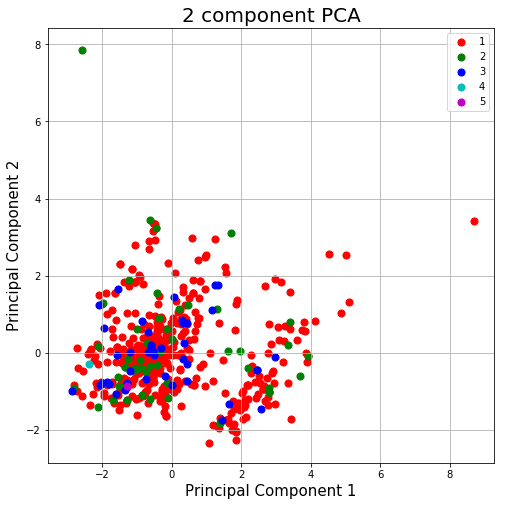

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


targets= [1,2,3,4,5] # category values
colors = ['r','g','b','c','m']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component1']
               , finalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [28]:
# Apply PCA on ISI, DMC and DC to get the latent variable FWI
from sklearn.preprocessing import StandardScaler
features = ['DMC','DC','ISI']

# Separating out the features
X = dataset.iloc[:, [5,6,7]].values


# Separating out the target
Y= dataset.iloc[:, [13]].values

# Standardizing the features
X= StandardScaler().fit_transform(X)

In [29]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component1','principal component2'])

In [30]:
finalDf = pd.concat([principalDf, dataset[['category']]], axis = 1)

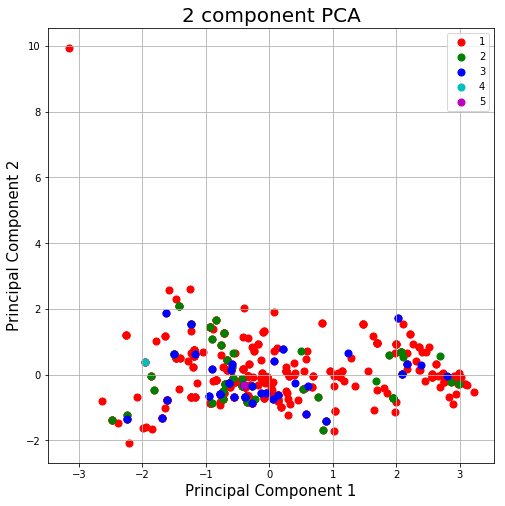

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets= [1,2,3,4,5]
colors = ['r','g','b','c','m']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component1']
               , finalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [32]:
dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,1.272727
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.626522
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,1.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,1.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,1.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,5.000000


In [33]:
# Data preperation 
months_table = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days_table =   ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

dataset['month'] = [months_table.index(month) for month in dataset['month'] ]
dataset['day'] =   [days_table.index(day)     for day   in dataset['day']   ]

dataset['X'] -= 1
dataset['Y'] -= 2

dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
0,6,3,2,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,6,2,9,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,6,2,9,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,4,2,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,4,2,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [34]:
# Excluding row headers
for idx in list(range(4, number_of_columns - 1)):  
    dataset[fires_attributes[idx]] = dataset[fires_attributes[idx]] - \
                                   dataset[fires_attributes[idx]].mean()

In [35]:
statistics = [dataset[fires_attributes[idx]].mean() for idx in range(0, number_of_columns)]
statistics = pandas.DataFrame(statistics, 
                              index=fires_attributes,
                              columns=['mean'])

In [36]:
# Mean for FFMC through Rain is 0.000
statistics.T

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,category
mean,3.669246,2.299807,6.475822,2.972921,2.319091e-13,-1.665721e-14,4.511190e-13,-3.411842e-15,1.504921e-15,9.029528e-15,-7.868196e-16,4.262655e-17,4.892712e-15,1.272727


In [37]:
statistics = list()
# Apply OLS and Print OLS regression results
for idx in range(0, number_of_columns - 1):
    model = smf.ols(formula = "category ~ " + 
                    fires_attributes[idx], data = dataset).fit()
    title = 'Model: category ~ ' + fires_attributes[idx]
    print('category vs ' + fires_attributes[idx])
    print(model.summary())
    statistics.append([model.f_pvalue, model.rsquared])

category vs X
                            OLS Regression Results                            
Dep. Variable:               category   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.924
Date:                Tue, 25 Sep 2018   Prob (F-statistic):              0.166
Time:                        23:14:42   Log-Likelihood:                -490.39
No. Observations:                 517   AIC:                             984.8
Df Residuals:                     515   BIC:                             993.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2121      0.052     2

category vs temp
                            OLS Regression Results                            
Dep. Variable:               category   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.756
Date:                Tue, 25 Sep 2018   Prob (F-statistic):              0.186
Time:                        23:14:42   Log-Likelihood:                -490.48
No. Observations:                 517   AIC:                             985.0
Df Residuals:                     515   BIC:                             993.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2727      0.028   

In [38]:
statistics = pandas.DataFrame(statistics, 
                              index=fires_attributes[: number_of_columns - 1], 
                              columns=['p-value', 'R-squared'])
statistics.T

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
p-value,0.166003,0.876359,0.052031,0.788871,0.482815,0.230321,0.265767,0.707808,0.185716,0.253070,0.225647,0.427576,2.213121e-50
R-squared,0.003722,0.000047,0.007310,0.000139,0.000957,0.002793,0.002404,0.000273,0.003398,0.002536,0.002849,0.001223,3.514604e-01


In [39]:
statistics[statistics['p-value'] < 0.20]


,p-value,R-squared
X,1.660026e-01,0.003722
month,5.203068e-02,0.007310
temp,1.857157e-01,0.003398
area,2.213121e-50,0.351460


In [40]:
print((smf.ols(formula = "category ~ temp", data = dataset).fit()).summary())


                            OLS Regression Results                            
Dep. Variable:               category   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.756
Date:                Tue, 25 Sep 2018   Prob (F-statistic):              0.186
Time:                        23:14:42   Log-Likelihood:                -490.48
No. Observations:                 517   AIC:                             985.0
Df Residuals:                     515   BIC:                             993.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2727      0.028     46.223      0.0

In [41]:
# Combination of all variables
explanatory_variables = "X + Y + month + day + FFMC + DMC + DC + ISI + temp + RH + " + \
                        "wind + rain + area" 
response_variable =     "category"

model = smf.ols(formula = response_variable + " ~ " + explanatory_variables, 
                data = dataset).fit()

                            OLS Regression Results                            
Dep. Variable:               category   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     22.25
Date:                Tue, 25 Sep 2018   Prob (F-statistic):           5.70e-42
Time:                        23:14:43   Log-Likelihood:                -373.90
No. Observations:                 517   AIC:                             775.8
Df Residuals:                     503   BIC:                             835.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0563      0.154      6.852      0.0

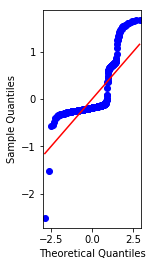

In [42]:
print(model.summary())
ax1 = plt.subplot(1, 3, 1)
qq_plot = sm.qqplot(model.resid, line = 'r', ax = ax1)

In [43]:
X = dataset.iloc[:, 5:6:7].values 
Y = dataset.iloc[:, 13].values

In [44]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0) 

In [45]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
print(regressor.intercept_)

1.2354307691474518


In [47]:
print(regressor.coef_)

[0.00011592]


In [48]:
Y_pred = regressor.predict(X_test)

In [49]:
df = pandas.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}).reset_index() 
df

,index,Actual,Predicted
0,0,2,1.228629
1,1,1,1.232397
2,2,1,1.237660
3,3,3,1.238031
4,4,1,1.233058
5,5,1,1.238946
6,6,1,1.228386
7,7,1,1.238958
8,8,2,1.245079
9,9,1,1.223506


In [50]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.48194147618595595
Mean Squared Error: 0.5261115625570242
Root Mean Squared Error: 0.7253354827643718
